Text(0.5, 1.0, 'OD_OG')

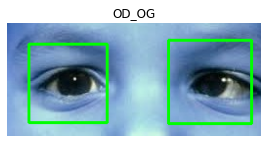

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
image = cv2.imread("image-11bis.jpeg", 1)

# Convert the image to grayscale for easier computation
image_grey = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

cascade_classifier = cv2.CascadeClassifier("/content/haarcascade_eye.xml")
detected_objects = cascade_classifier.detectMultiScale(image_grey, minSize=(10, 10))

# Draw rectangles on the detected objects
if len(detected_objects) != 0:
    for (x, y, width, height) in detected_objects:
        cv2.rectangle(image, (x, y),
                      (x + width, y + height),
                      (0, 255, 0), 2)
fig = plt.figure(figsize=(10, 10)) 
  
rows = 2
columns = 2
fig.add_subplot(rows, columns, 1) 
  
plt.imshow(image) 
plt.axis('off') 
plt.title("OD_OG") 



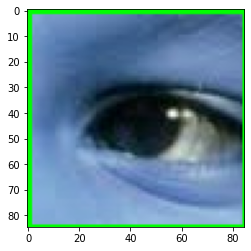

In [2]:
OD1 = image[y:y+height, x:x+width]
fig = plt.figure(figsize=(4, 4))
plt.imshow(OD1)

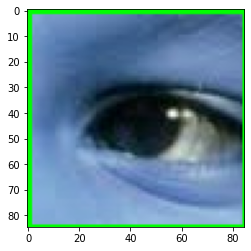

In [3]:
OD1_gray = cv2.cvtColor(OD1, cv2.COLOR_BGR2GRAY)
fig = plt.figure(figsize=(4, 4))
plt.imshow(OD1)

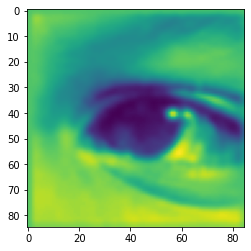

In [4]:
OD1_blur = cv2.GaussianBlur(OD1_gray, (5, 5), 1)
fig = plt.figure(figsize=(4, 4))
plt.imshow(OD1_blur)

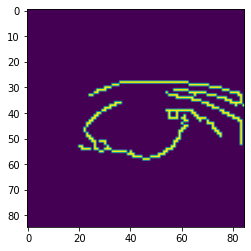

In [5]:
# détection des contours
OD1_canny = cv2.Canny(OD1_blur, 90, 180)
fig = plt.figure(figsize=(4, 4))
plt.imshow(OD1_canny)

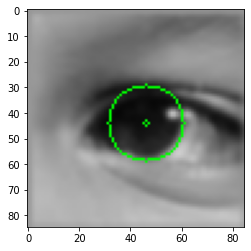

In [7]:
OD_color = cv2.cvtColor(OD1_blur, cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(OD1_canny, cv2.HOUGH_GRADIENT, 1, 30, param1=20, param2=10, minRadius=1, maxRadius=30)
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x,y,r) in circles:
        cv2.circle(OD_color, (x,y), r, (0,255,0), 1)
        cv2.circle(OD_color, (x,y), 1, (0,255,0), 1)
fig = plt.figure(figsize=(4, 4))
plt.imshow(OD_color)

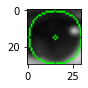

In [8]:
cornée_g = OD_color[y-r:y+r, x-r:x+r]
fig = plt.figure(figsize=(1, 1))
plt.imshow(cornée_g)

In [25]:
print(x, y)

15.0 15.0


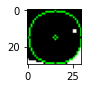

In [22]:
# binariser l'image
ret, cornée_b = cv2.threshold(cornée_g, 150, 255, cv2.THRESH_BINARY)
fig = plt.figure(figsize=(1, 1))
plt.imshow(cornée_b)


In [24]:
cornée_b_array = np.array(cornée_b)
print(type(cornée_b_array))
print(cornée_b_array.dtype)
print(cornée_b_array.shape)
# print(cornée_b_array)



<class 'numpy.ndarray'>
uint8
(30, 30, 3)


In [27]:
w, h = cornée_g.shape[:2]
x = w//2
y = h//2
print(x, y)

15 15


In [31]:
for a in range(x, w):
  for b in range(0, 25):
    cornée_b[b, a] = (255)
print(a)
print(b)

29
24
